## A.I. Assignment 5

## Learning Goals

By the end of this lab, you should be able to:
* Get more familiar with tensors in pytorch 
* Create a simple multilayer perceptron model with pytorch
* Visualise the parameters


### Task

Build a fully connected feed forward network that adds two bits. Determine the a propper achitecture for this network (what database you use for this problem? how many layers? how many neurons on each layer? what is the activation function? what is the loss function? etc)

Create at least 3 such networks and compare their performance (how accurate they are?, how farst they are trained to get at 1 accuracy?)

Display for the best one the weights for each layer.


In [75]:
import torch
import torch.nn as nn
from collections import OrderedDict


In [76]:
# your code here
model1 = torch.nn.Sequential(OrderedDict([
   ('hidden', nn.Linear(2, 1)),
    ('activation', nn.Sigmoid()),
    ('output', nn.Linear(1, 2)),
    ('sigmoid', nn.Sigmoid())
]))

optimizer1 = torch.optim.SGD(model1.parameters(), lr=0.1)

In [77]:
print(model1)

Sequential(
  (hidden): Linear(in_features=2, out_features=1, bias=True)
  (activation): Sigmoid()
  (output): Linear(in_features=1, out_features=2, bias=True)
  (sigmoid): Sigmoid()
)


In [78]:
model2 = nn.Sequential(OrderedDict([
   ('hidden', nn.Linear(2, 8)),
    ('activation', nn.Sigmoid()),
    ('output', nn.Linear(8, 2)),
    ('sigmoid', nn.Sigmoid())
]))

optimizer2 = torch.optim.SGD(model2.parameters(), lr=0.1)

In [79]:
print(model2)

Sequential(
  (hidden): Linear(in_features=2, out_features=8, bias=True)
  (activation): Sigmoid()
  (output): Linear(in_features=8, out_features=2, bias=True)
  (sigmoid): Sigmoid()
)


In [80]:
model3 = nn.Sequential(OrderedDict([
   ('hidden', nn.Linear(2, 8)),
    ('activation', nn.SiLU()),
    ('output', nn.Linear(8, 2)),
    ('sigmoid', nn.Sigmoid())
]))

optimizer3 = torch.optim.SGD(model3.parameters(), lr=0.1)

In [81]:
print(model3)

Sequential(
  (hidden): Linear(in_features=2, out_features=8, bias=True)
  (activation): SiLU()
  (output): Linear(in_features=8, out_features=2, bias=True)
  (sigmoid): Sigmoid()
)


In [82]:
model4 = nn.Sequential(OrderedDict([
   ('hidden_1', nn.Linear(2, 4)),
    ('activation_1', nn.SiLU()),
    ('hidden_2', nn.Linear(4, 16)),
     ('activation_2', nn.SiLU()),
     ('hidden_3', nn.Linear(16, 4)),
      ('activation_3', nn.SiLU()),
    ('output', nn.Linear(4, 2)),
    ('sigmoid', nn.Sigmoid())
]))

optimizer4 = torch.optim.SGD(model4.parameters(), lr=0.1)

In [83]:
print(model4)

Sequential(
  (hidden_1): Linear(in_features=2, out_features=4, bias=True)
  (activation_1): SiLU()
  (hidden_2): Linear(in_features=4, out_features=16, bias=True)
  (activation_2): SiLU()
  (hidden_3): Linear(in_features=16, out_features=4, bias=True)
  (activation_3): SiLU()
  (output): Linear(in_features=4, out_features=2, bias=True)
  (sigmoid): Sigmoid()
)


In [84]:
# your code here
data_in = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]]).float()
print(data_in)

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])


In [85]:
# your code here
data_target = torch.tensor([[0, 0], [0, 1], [0, 1], [1, 0]]).float()
print(data_target)

tensor([[0., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.]])


In [86]:
# your code here
# Train the model
import matplotlib.pyplot as plt

def get_accuracy(predicted):
    count_correct = 0
    for i in range(len(data_in)):
        predicted_first_bit = predicted[i][0] >= 0.5 
        predicted_second_bit = predicted[i][1] >= 0.5 
        count_correct += (predicted_first_bit == data_target[i][0] and predicted_second_bit == data_target[i][1])
    return count_correct / len(data_in)

def plot_graph(losses_history):
    fig = plt.figure()
    plt.title('loss')
    plt.plot([loss[0] for loss in losses_history], [loss[1] for loss in losses_history])

def train_model(model, optimizer, criterion = nn.MSELoss(reduction='sum'), no_epochs=5001):
    losses_history = []
    
    for epoch in range(no_epochs):
        predicted = model(data_in)
        loss_here = criterion(predicted, data_target)
        
        optimizer.zero_grad()
        loss_here.backward()
        optimizer.step()

        if epoch % 100 == 0:
            losses_history.append([epoch, loss_here.item()])
        
        if epoch % 1000 == 0:
            print("Loss after epoch " + str(epoch) + " using loss " + str(criterion) + ": " + str(loss_here.item()))

    print("Accuracy after " + str(no_epochs) + " epochs: " + str(get_accuracy(model(data_in)).item()))
    plot_graph(losses_history)


Loss after epoch 0 using loss MSELoss(): 1.9292993545532227
Loss after epoch 1000 using loss MSELoss(): 1.1424896717071533
Loss after epoch 2000 using loss MSELoss(): 0.7998927235603333
Loss after epoch 3000 using loss MSELoss(): 0.7292110323905945
Loss after epoch 4000 using loss MSELoss(): 0.7068506479263306
Loss after epoch 5000 using loss MSELoss(): 0.696100115776062
Accuracy after 5001 epochs: 0.75


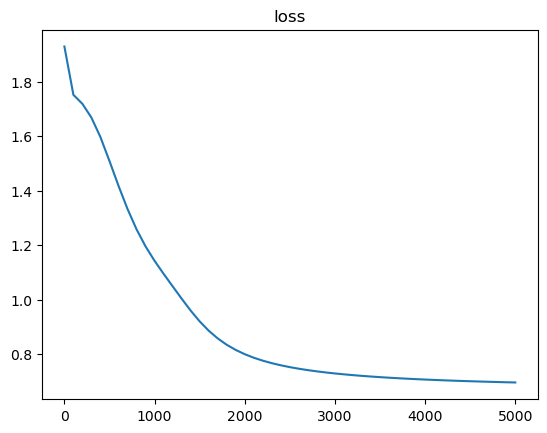

In [87]:
# train_model(model1, optimizer1, criterion=nn.BCEWithLogitsLoss())
train_model(model1, optimizer1)

Loss after epoch 0 using loss MSELoss(): 2.2458035945892334
Loss after epoch 1000 using loss MSELoss(): 0.9738552570343018
Loss after epoch 2000 using loss MSELoss(): 0.07698317617177963
Loss after epoch 3000 using loss MSELoss(): 0.021642910316586494
Loss after epoch 4000 using loss MSELoss(): 0.011684255674481392
Loss after epoch 5000 using loss MSELoss(): 0.007808360271155834
Accuracy after 5001 epochs: 1.0


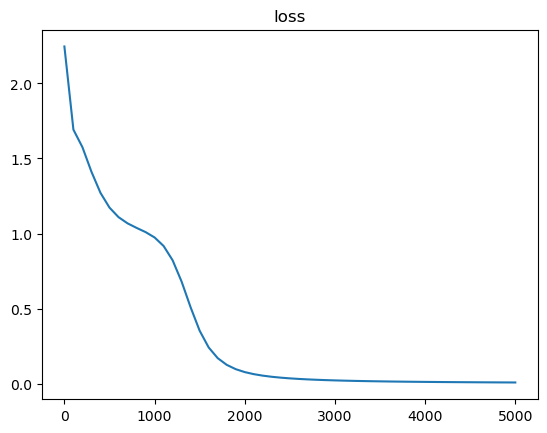

In [88]:
# train_model(model2, optimizer2, criterion=nn.BCEWithLogitsLoss())
train_model(model2, optimizer2)

Loss after epoch 0 using loss MSELoss(): 1.9795104265213013
Loss after epoch 1000 using loss MSELoss(): 0.009241726249456406
Loss after epoch 2000 using loss MSELoss(): 0.00351054803468287
Loss after epoch 3000 using loss MSELoss(): 0.0021121224854141474
Loss after epoch 4000 using loss MSELoss(): 0.0014952911296859384
Loss after epoch 5000 using loss MSELoss(): 0.0011511541670188308
Accuracy after 5001 epochs: 1.0


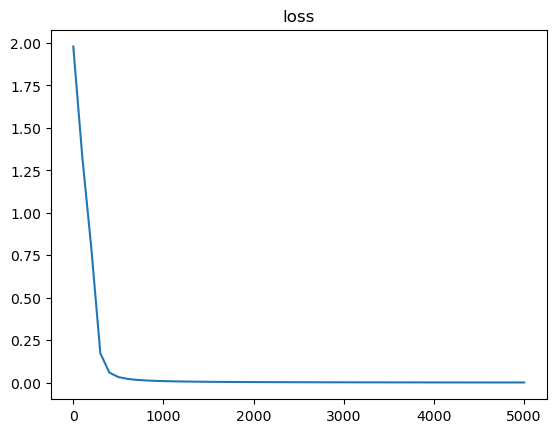

In [89]:
# train_model(model3, optimizer3, criterion=nn.BCEWithLogitsLoss())
train_model(model3, optimizer3)

Loss after epoch 0 using loss MSELoss(): 1.9083828926086426
Loss after epoch 1000 using loss MSELoss(): 0.000942534941714257
Loss after epoch 2000 using loss MSELoss(): 0.0002516490058042109
Loss after epoch 3000 using loss MSELoss(): 0.0001323939359281212
Loss after epoch 4000 using loss MSELoss(): 8.66394184413366e-05
Loss after epoch 5000 using loss MSELoss(): 6.317318911897019e-05
Accuracy after 5001 epochs: 1.0


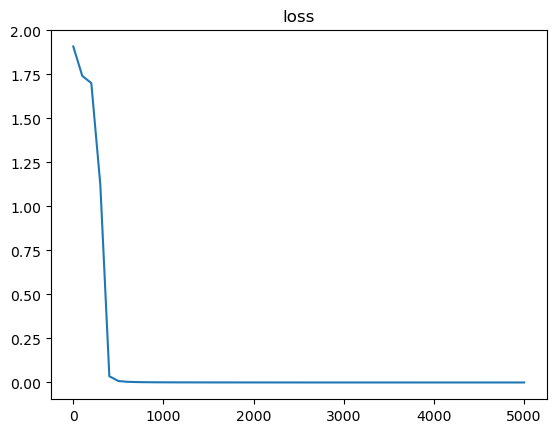

In [90]:
# train_model(model4, optimizer4, criterion=nn.BCEWithLogitsLoss())
train_model(model4, optimizer4)

In [92]:
# your code here
# print model wights
print(model4[0].weight)
print(model4[2].weight)
print(model4[4].weight)
print(model4[6].weight)

Parameter containing:
tensor([[-0.7667, -0.7852],
        [-1.2274, -0.8603],
        [ 0.9730,  1.4304],
        [-0.5300, -0.7113]], requires_grad=True)
Parameter containing:
tensor([[ 0.1220,  1.2216, -0.5857,  0.5388],
        [-0.2920, -0.3774, -0.1762,  0.3134],
        [-0.4859, -0.5523,  0.6238, -0.0034],
        [ 0.2245,  0.3244, -0.1570,  0.3608],
        [ 0.3280, -0.3077,  0.6539,  0.2438],
        [ 0.0714, -0.2847,  0.3326,  0.1675],
        [ 0.4100, -0.1240, -0.2921,  0.3178],
        [ 0.5334,  0.1814, -0.0584,  0.6142],
        [ 0.5159,  0.5810, -0.2324, -0.0519],
        [ 0.4980,  0.7003,  0.0773,  0.2892],
        [-0.2534,  0.3808,  0.0565,  0.3079],
        [ 0.5003, -0.4236, -0.1331,  0.2093],
        [-0.6581, -0.8338,  1.1738, -0.2936],
        [ 0.1525,  0.0687, -0.3429,  0.6781],
        [ 0.6392,  1.4442, -0.5002,  0.2338],
        [-0.1777, -0.8763,  0.2650, -0.2301]], requires_grad=True)
Parameter containing:
tensor([[ 0.7910, -0.2244, -0.2881,  0.3575,

In [100]:
# model4(data_in[3])